In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
%run Burlington_Data_2021.ipynb

In [3]:
%run Oshawa.ipynb

175383 and 159458
    1070 and     1015
  1400 and   1300
   42875 and    19720
 42750 and  23880
 Median sale price in 2016 : $420,000 & median sale price in 2021 : $765,000
the latitude is: 43.8975558 and the longitude is: -78.8635324


In [4]:
%run Housing.ipynb

193832, 213759
66270, 73560
113666, 128000
6.9, 11.7
0.83%, 0.72%
1,791 1,824
2,437 3,193
54130, 57025
12135, 16530
{'features': [{'bbox': [-79.8109532, 43.3648541, -79.6198948, 43.5284371],
               'geometry': {'coordinates': [-79.666672, 43.447436],
                            'type': 'Point'},
               'properties': {'address_line1': 'Oakville, ON',
                              'address_line2': 'Canada',
                              'category': 'administrative',
                              'city': 'Oakville',
                              'country': 'Canada',
                              'country_code': 'ca',
                              'county': 'Halton Region',
                              'datasource': {'attribution': '© OpenStreetMap '
                                                            'contributors',
                                             'license': 'Open Database License',
                                             'sourcename': 'openstree

In [5]:
%run Vaughan.ipynb

Population 2016: 306233
Population 2021: 323103
Income 2016:    90615
Income 2021: 124000
Unemployment Rate 2016:   5.8
Unemployment Rate 2021:    12.5
Tax Rate 2016: 0.815855
Tax Rate 2021: 0.669976
Estimated Price 2016:   893065
Estimated Price 2021: 1282000
Average Rental 2016: 2492
Average Rental 2021: 2841
Median Rental 2016: 2300
Median Rental 2021: 2550
Average Sale Price 2016: 656698
Average Sale Price 2021: 1299913
Median Sale Price 2016: 600000
Median Sale Price 2021: 1200000
Number Owned 2016:    84490
Number Owned 2021:  89290
Number Rented 2016:     9765
Number Rented 2021:  14620
Number of Newly Built 2016: 2,270
Number of Newly Built 2021: 5,564
Latitude: 43.7963436
Longitude: -79.60313070528753
251


In [6]:
%run "Milton Analysis Project 1 Bootcamp.ipynb"

In [7]:
all_cities_df = pd.concat([burlington_final_df, Oakville_df, vaughan_df, cleaned_milton_df, Oshawa_df])
all_cities_df = all_cities_df.iloc[:, :-1]
all_cities_df = all_cities_df.replace({'\$': '', ',': '', '%': ''}, regex=True)
all_cities_df = all_cities_df.astype(float)
all_cities_df

Population  Household Income ($)  Average Rent ($)  \
City       Year                                                        
Burlington 2016     183314.0              123402.0            2710.0   
           2021     186948.0              140200.0            2862.0   
Oakville   2016     193832.0              113666.0            3154.0   
            2021    213759.0              128000.0            3363.0   
Vaughan    2016     306233.0               90615.0            2492.0   
            2021    323103.0              124000.0            2841.0   
Milton     2016     110128.0              120157.0            2821.0   
           2021     132979.0              142600.0            2785.0   
Oshawa     2016     159458.0               70211.0            1070.0   
            2021    175383.0               86000.0            1400.0   

                  Median Rent ($)  Estimated House Value ($)  \
City       Year                                                
Burlington 2016            2400.0                   632556.0   
           2021            2800.0                  1024000.0   
Oakville   2016            2588.0                   883853.0   
            2021           3000.0                  1388000.0   
Vaughan    2016            2300.0                   893065.0   
            2021           2550.0                  1282000.0   
Milton     2016            2150.0                   622911.0   
           2021            2650.0                  1022000.0   
Oshawa     2016            1015.0                   397934.0   
            2021           1300.0                   705000.0   

                  Unemployment Rate (%)  Property Tax Rate (%)  Rented Houses  \
City       Year                                                                 
Burlington 2016                     5.6               0.871013        16835.0   
           2021                    10.7               0.779583        18220.0   
Oakville   2016                     6.9               0.830000        12135.0   
            2021                   11.7               0.720000        16530.0   
Vaughan    2016                     5.8               0.815855         9765.0   
            2021                   12.5               0.669976        14620.0   
Milton     2016                     5.6               0.006820         4840.0   
           2021                    11.4               0.007449         6950.0   
Oshawa     2016                     9.8               1.561085        19720.0   
            2021                   15.2               1.304741        23880.0   

                  Owned Houses  New Built  Average Sale Price ($)  \
City       Year                                                     
Burlington 2016        54540.0      542.0                663675.0   
           2021        54955.0     1494.0               1081961.0   
Oakville   2016        54130.0     1791.0               1063117.0   
            2021       57025.0     1824.0               1579928.0   
Vaughan    2016        84490.0     2270.0                656698.0   
            2021       89290.0     5564.0               1299913.0   
Milton     2016        29415.0      891.0                657525.0   
           2021        33085.0     1073.0               1104704.0   
Oshawa     2016        42875.0      834.0                443635.0   
            2021       42750.0     1416.0                798221.0   

                  Median Sale Price ($)  
City       Year                          
Burlington 2016                609000.0  
           2021                975500.0  
Oakville   2016                920000.0  
            2021              1387500.0  
Vaughan    2016                600000.0  
            2021              1200000.0  
Milton     2016                621000.0  
           2021                990000.0  
Oshawa     2016                420000.0  
            2021               765000.0

In [8]:
all_amenities_df = pd.concat([burlington_amenities_df, Oakville_amenities_df, vaughan_amenities_df, milton_leisure_df, Oshawa_amenities_df])
all_amenities_df = all_amenities_df.astype(int)
all_amenities_df

,# of Public Schools,# of Catholic Schools,# of Private Schools,# of Leisure Spaces
City,,,,
Burlington,38,17,2,282
Oakville,39,28,32,428
Vaughan,3,3,8,251
Milton,21,14,4,234
Oshawa,32,15,8,356


**<font size =5> School Graph <font>***

<Axes: title={'center': 'Number of schools by type per cities'}, xlabel='City', ylabel='Total Number'>

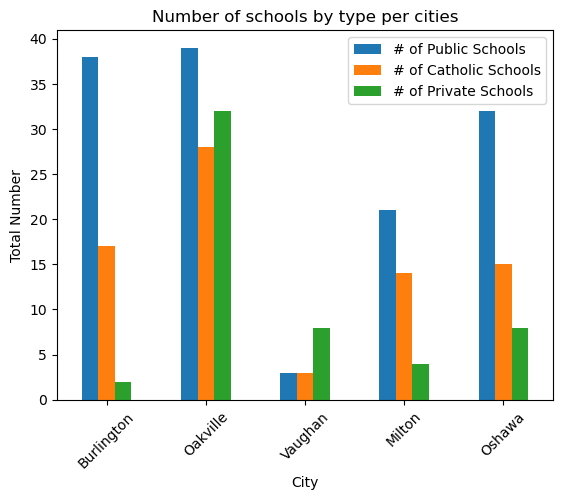

In [10]:
all_amenities_df[["# of Public Schools","# of Catholic Schools","# of Private Schools"]].plot(kind = 'bar',
                                                                        title = 'Number of schools by type per cities',
                                                                        ylabel = 'Total Number',
                                                                         rot = 45)

In [ ]:
#Save fig ?

A possible factor to the Housing Market increase could be the education. We generated a graph displaying the total number of schools by type in each city.
This helped us conclude the below points :
1. For each type of schools, Oakville possesses the highest number.
2. There's a significative difference in number for private schools in Oakville when compared to the 4 other cities.

CONTINUER avec des chiffres et créer une df avec le total pour montrer des chiffres.

**<font size = 5> Owned vs Rented Houses <font>**

In [137]:
#Extract a df from the all_cities_df
rented_vs_owned = all_cities_df[['Owned Houses',"Rented Houses"]]
rented_vs_owned

Owned Houses  Rented Houses
City       Year                              
Burlington 2016        54540.0        16835.0
           2021        54955.0        18220.0
Oakville   2016        54130.0        12135.0
            2021       57025.0        16530.0
Vaughan    2016        84490.0         9765.0
            2021       89290.0        14620.0
Milton     2016        29415.0         4840.0
           2021        33085.0         6950.0
Oshawa     2016        42875.0        19720.0
            2021       42750.0        23880.0

<Axes: title={'center': 'Owned Houses vs Rented Houses in 2016 and 2021 per city'}, xlabel='City,Year', ylabel='Number of Houses'>

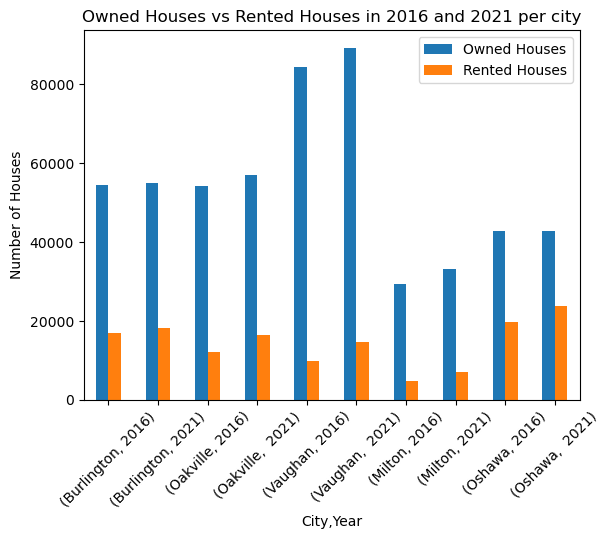

In [138]:
#Version 1
%matplotlib inline
rented_vs_owned.plot(kind = 'bar', title = "Owned Houses vs Rented Houses in 2016 and 2021 per city", rot =45,
                    ylabel = "Number of Houses")

#Should I change to have 2016 on one side and 2021 on another ?

In [151]:
#Try to calculate the %change of owned and rented houses. the %change in the population and find a correlation 
#between the two sets and compare which one has a bigger correlation.
rented_vs_owned = all_cities_df[["Population","Owned Houses","Rented Houses"]]
rented_vs_owned

Population  Owned Houses  Rented Houses
City       Year                                          
Burlington 2016     183314.0       54540.0        16835.0
           2021     186948.0       54955.0        18220.0
Oakville   2016     193832.0       54130.0        12135.0
            2021    213759.0       57025.0        16530.0
Vaughan    2016     306233.0       84490.0         9765.0
            2021    323103.0       89290.0        14620.0
Milton     2016     110128.0       29415.0         4840.0
           2021     132979.0       33085.0         6950.0
Oshawa     2016     159458.0       42875.0        19720.0
            2021    175383.0       42750.0        23880.0

The correlation between the increase of population and owned houses is 0.9895626575881576
The correlation between the increase of population and rented houses is 0.10872582127899905


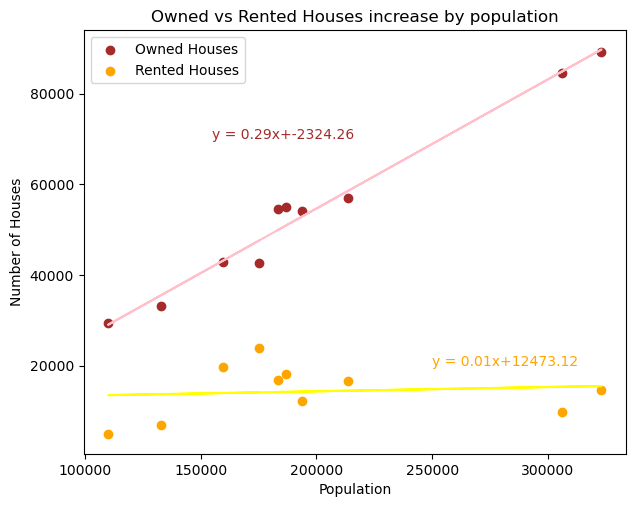

In [144]:
#Determining my axis
x_axis = rented_vs_owned["Population"]
y_axis = rented_vs_owned["Owned Houses"]
y_axis2 = rented_vs_owned["Rented Houses"]


#Plotting the chart
fig, ax = plt.subplots()
ax.scatter(x_axis, y_axis, color = 'brown',label='Owned Houses')
ax.scatter(x_axis, y_axis2, color = 'orange',label='Rented Houses')
plt.xlabel ("Population")
plt.ylabel ("Number of Houses")
plt.title('Owned vs Rented Houses increase by population')
plt.legend()

#Adding regression lines
output_owned_houses = st.linregress(x_axis, y_axis)
output_rented_houses = st.linregress(x_axis, y_axis2)
slope1 = output_owned_houses[0]
slope2 = output_rented_houses[0]
intercept1 = output_owned_houses[1]
intercept2 = output_rented_houses[1]
regressline1 = slope1*x_axis+intercept1
regressline2 = slope2*x_axis+intercept2
line_eq1 = f'y = {round(slope1,2)}x+{round(intercept1,2)}'
line_eq2 = f'y = {round(slope2,2)}x+{round(intercept2,2)}'
corr1 = np.corrcoef(x_axis,y_axis)
corr2 = np.corrcoef(x_axis,y_axis2)
#Displaying the regression lines
plt.plot(x_axis,regressline1, color = 'pink')
plt.plot(x_axis,regressline2, color = 'yellow')
plt.annotate(line_eq1,(155000,70000), color = 'brown')
plt.annotate(line_eq2,(250000,20000),color = 'orange')
fig.set_figheight(5.5)
fig.set_figwidth(7)
plt.plot()

#Correlation coefficients 
corr1 = np.corrcoef(x_axis,y_axis)
corr2 = np.corrcoef(x_axis,y_axis2)
print(f'The correlation between the increase of population and owned houses is {corr1[1][0]}')
print(f'The correlation between the increase of population and rented houses is {corr2[1][0]}')


Using each city as our sample of Ontario's population, we are able to show that most population incline towards owning a house than renting one. 

In [153]:
#Pie chart
rented_vs_owned = rented_vs_owned.reset_index()
rented_vs_owned['Year'] = rented_vs_owned["Year"].astype(int)
df_2016 = rented_vs_owned.loc[rented_vs_owned['Year']==2016]
df_2016

,index,City,Year,Population,Owned Houses,Rented Houses
0,0,Burlington,2016,183314.0,54540.0,16835.0
2,2,Oakville,2016,193832.0,54130.0,12135.0
4,4,Vaughan,2016,306233.0,84490.0,9765.0
6,6,Milton,2016,110128.0,29415.0,4840.0
8,8,Oshawa,2016,159458.0,42875.0,19720.0


In [187]:
df_2021 = rented_vs_owned.loc[rented_vs_owned['Year']==2021]
df_2021

,index,City,Year,Population,Owned Houses,Rented Houses
1,1,Burlington,2021,186948.0,54955.0,18220.0
3,3,Oakville,2021,213759.0,57025.0,16530.0
5,5,Vaughan,2021,323103.0,89290.0,14620.0
7,7,Milton,2021,132979.0,33085.0,6950.0
9,9,Oshawa,2021,175383.0,42750.0,23880.0


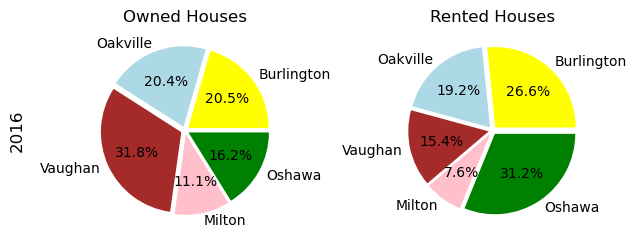

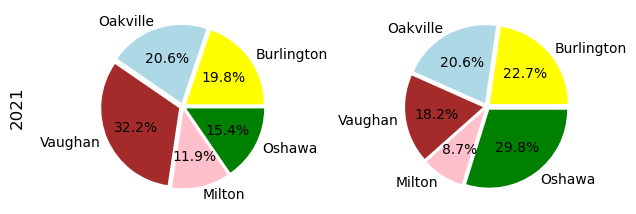

In [209]:
fig, ax1 = plt.subplots(1, 2)

values_o_2016 = df_2016['Owned Houses']
values_r_2016 = df_2016['Rented Houses']
values_o_2021 = df_2021['Owned Houses']
values_r_2021 = df_2021['Rented Houses']
names = df_2016["City"]
colors =['yellow',"lightblue","brown","pink","green"]
explosion =[0.05,0.05,0.05,0.05,0.05]


# ...
ax1[0].pie(values_o_2016,labels = names, colors = colors, autopct = '%1.1f%%', explode = explosion)
ax1[0].set_title('Owned Houses')
#...
ax1[1].pie(values_r_2016,labels = names, colors = colors, autopct = '%1.1f%%',explode = explosion)
ax1[1].set_title('Rented Houses')
fig.supylabel('2016')
fig.tight_layout()



# ...
fig, ax2 = plt.subplots(1, 2)
# ...
ax2[0].pie(values_o_2021,labels = names, colors = colors, autopct = '%1.1f%%',explode = explosion)

# ...
ax2[1].pie(values_r_2021,labels = names, colors = colors, autopct = '%1.1f%%',explode = explosion)
fig.supylabel('2021')
fig.tight_layout()



plt.show()